## Online Retail ##
**This is a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.**

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
df=pd.read_excel(r"C:\Users\User\Documents\data analysis dataset\Online Retail.xlsx")

In [27]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [34]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice
count,541909.000000,541909,541909.000000,406829.000000,541909.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570,17.987795
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000,-168469.600000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000,3.400000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000,9.750000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000,17.400000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,168469.600000
std,218.081158,NaN,96.759853,1713.600303,378.810824


In [35]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [36]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
TotalPrice          0
dtype: int64

In [37]:
df['TotalPrice']=df['Quantity']*df['UnitPrice']

In [38]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [39]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
TotalPrice          0
dtype: int64

In [40]:
df.isnull().sum().sort_values()*100/ len(df)

InvoiceNo       0.000000
StockCode       0.000000
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
Country         0.000000
TotalPrice      0.000000
Description     0.268311
CustomerID     24.926694
dtype: float64

In [41]:
df.dropna(subset=['CustomerID'],inplace=True) #missing CustomerID values dropped. This ensures the analysis is accurate for identifying unique customer behaviors.

### Exploratory Data Analysis (EDA) ###

In [46]:
#sales performance analysis
#Monthly and weekly sales trends
df['Month']= df['InvoiceDate'].dt.month
df['Week']=df['InvoiceDate'].dt.isocalendar().week


In [47]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month,Weekly,Week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,48,48
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,48,48
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,48,48
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,48,48
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,48,48


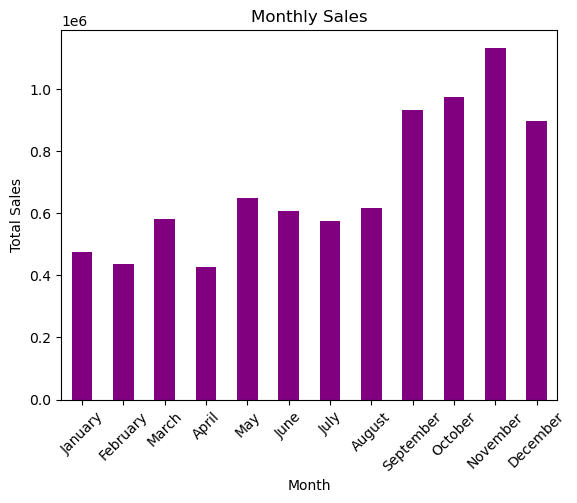

In [63]:
#Monthly Sales analysis

monthly_Sales=df.groupby('Month')['TotalPrice'].sum()
weekly_Sales=df.groupby('Week')['TotalPrice'].sum()
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_Sales.plot(kind='bar',color='purple')
plt.title('Monthly Sales' )
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(ticks=range(12), labels=month_names, rotation=45)
plt.show()


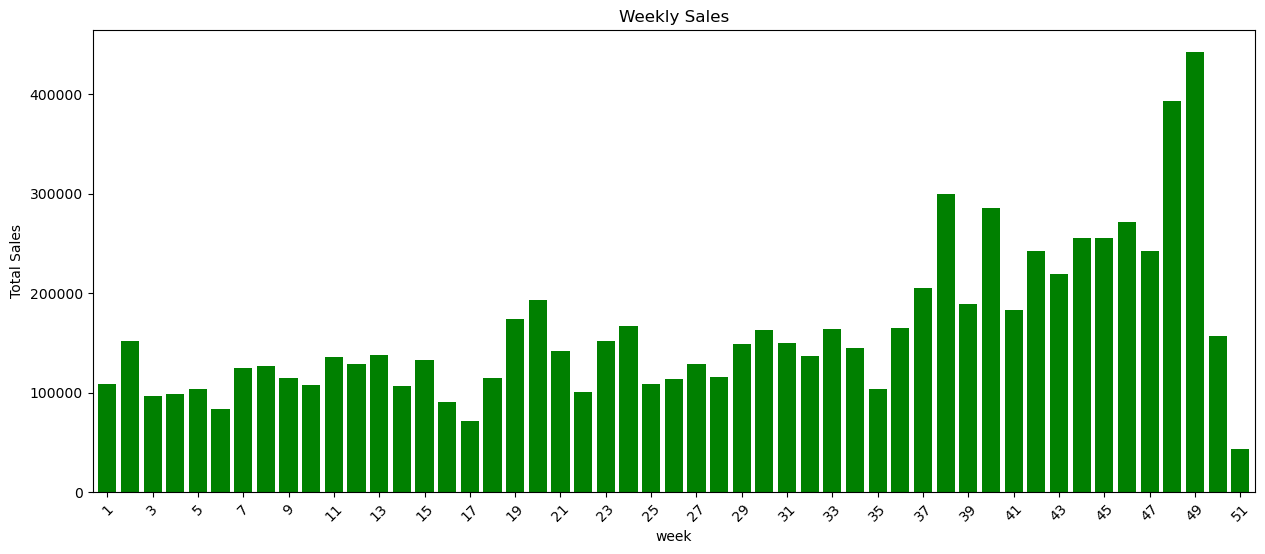

In [71]:
#Weekly Sales Analysis
weekly_sales = df.groupby('Week')['TotalPrice'].sum()
plt.figure(figsize=(15,6))
weekly_Sales.plot(kind='bar',color='Green',width=0.8)
plt.title('Weekly Sales' )
plt.xlabel('week')
plt.ylabel('Total Sales')
plt.xticks(ticks=range(0, len(weekly_sales), 2), rotation=45)
plt.show()

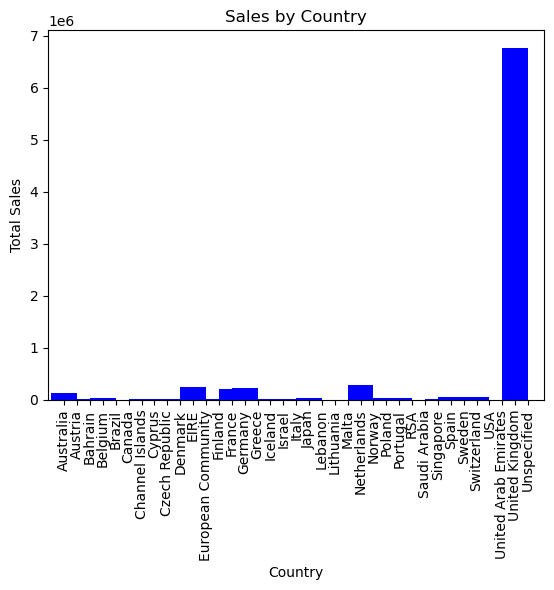

In [79]:
#Country Sales
country_sales = df.groupby('Country')['TotalPrice'].sum()   #.sort_values(ascending=False)
country_sales.plot(kind='bar', color ='blue', width=2.0)
plt.title('Sales by Country')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.show()


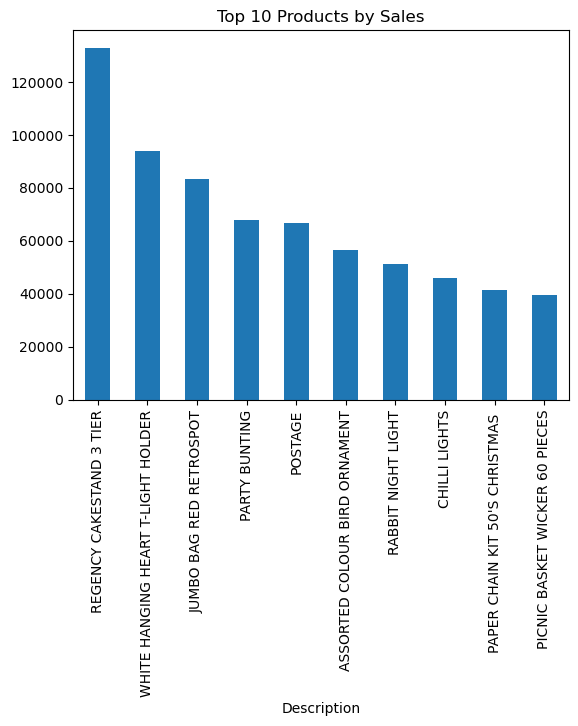

In [87]:
#Top_Products

top_products = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar')
plt.title("Top 10 Products by Sales")
plt.show()

